In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd


Patients_train_path = "/content/drive/MyDrive/Iqram Sir/PK_PD/Patients_train.csv"
Patients_test_path = "/content/drive/MyDrive/Iqram Sir/PK_PD/Patients_test.csv"

Patients_train = pd.read_csv(Patients_train_path)
Patients_test = pd.read_csv(Patients_test_path)

In [4]:
Patients_train = pd.read_csv(Patients_train_path, index_col=0)
Patients_test = pd.read_csv(Patients_test_path, index_col=0)

# %% Undersample data

step = 60  # Undersampling step


Patients_test_full = Patients_test.copy()

Patients_train_BIS = Patients_train[Patients_train['full_BIS'] == 0]
Patients_test_BIS = Patients_test[Patients_test['full_BIS'] == 0]
Patients_train_MAP = Patients_train[Patients_train['full_MAP'] == 0]
Patients_test_MAP = Patients_test[Patients_test['full_MAP'] == 0]

Patients_train_BIS = Patients_train_BIS[::step]
Patients_test_BIS = Patients_test_BIS[::step]
Patients_train_MAP = Patients_train_MAP[::step]
Patients_test_MAP = Patients_test_MAP[::step]



feature = 'All'
cov = ['age', 'sex', 'height', 'weight']
Ce_bis_eleveld = ['Ce_Prop_Eleveld', 'Ce_Rem_Eleveld']
Ce_map_eleveld = ['Ce_Prop_MAP_Eleveld', 'Ce_Rem_MAP_Eleveld']
Cplasma_eleveld = ['Cp_Prop_Eleveld', 'Cp_Rem_Eleveld']


# feat_A/ input features
if feature == 'All':
    X_col = cov + ['bmi', 'lbm', 'mean_HR'] + Ce_map_eleveld + Ce_bis_eleveld + Cplasma_eleveld
elif feature == '-bmi':
    X_col = cov + ['lbm', 'MAP_base_case', 'mean_HR'] + Ce_bis_eleveld + Ce_map_eleveld + Cplasma_eleveld
elif feature == '-lbm':
    X_col = cov + ['bmi', 'MAP_base_case', 'mean_HR'] + Ce_bis_eleveld + Ce_map_eleveld + Cplasma_eleveld
elif feature == '-map':
    X_col = cov + ['bmi', 'lbm', 'mean_HR'] + Ce_bis_eleveld + Ce_map_eleveld + Cplasma_eleveld
elif feature == '-hr':
    X_col = cov + ['bmi', 'lbm', 'MAP_base_case'] + Ce_bis_eleveld + Ce_map_eleveld + Cplasma_eleveld
elif feature == '-Cplasma':
    X_col = cov + ['bmi', 'lbm', 'MAP_base_case', 'mean_HR'] + Ce_bis_eleveld + Ce_map_eleveld
elif feature == '-Cmap':
    X_col = cov + ['bmi', 'lbm', 'MAP_base_case', 'mean_HR'] + Ce_bis_eleveld + Cplasma_eleveld
elif feature == '-Cbis':
    X_col = cov + ['bmi', 'lbm', 'MAP_base_case', 'mean_HR'] + Ce_map_eleveld + Cplasma_eleveld


Patients_train_BIS = Patients_train_BIS.dropna().reset_index(drop=True)
Patients_test_BIS = Patients_test_BIS.dropna().reset_index(drop=True)
Patients_train_MAP = Patients_train_MAP.dropna().reset_index(drop=True)
Patients_test_MAP = Patients_test_MAP.dropna().reset_index(drop=True)




X_train_BIS = Patients_train_BIS[X_col]
y_train_BIS = Patients_train_BIS['BIS']

X_test_BIS = Patients_test_BIS[X_col]
y_test_BIS = Patients_test_BIS['BIS']


X_train_MAP = Patients_train_MAP[X_col]
y_train_MAP = Patients_train_MAP['MAP']

X_test_MAP = Patients_test_MAP[X_col]
y_test_MAP = Patients_test_MAP['MAP']

In [5]:
X_train_BIS.shape,y_train_BIS.shape,X_test_BIS.shape,y_test_BIS.shape

((19055, 13), (19055,), (7932, 13), (7932,))

In [6]:
X_train_MAP.shape,y_train_MAP.shape,X_test_MAP.shape,y_test_MAP.shape

((18955, 13), (18955,), (7908, 13), (7908,))

In [7]:
X_train,X_test,y_train,y_test = X_train_BIS,X_test_BIS,y_train_BIS,y_test_BIS

#X_train,X_test,y_train,y_test = X_train_MAP,X_test_MAP,y_train_MAP,y_test_MAP

# BIS

## LSTM

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization



# Convert Pandas DataFrame to NumPy array
X_train_array = X_train.to_numpy()

# Reshape the data to have a sequence length of 1
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))


model = Sequential([
    LSTM(64, activation='relu', input_shape=(1, 13), return_sequences=True),
    BatchNormalization(),
    LSTM(32, activation='relu', return_sequences=False),
    BatchNormalization(),
    Dense(1, activation='linear')  # Assuming it's a regression task; change activation for classification
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust loss based on your task

history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2)  # Adjust batch size and validation split


Epoch 1/20
477/477 [==============================] - 6s 5ms/step - loss: 1711.8352 - val_loss: 1235.4215
Epoch 2/20
477/477 [==============================] - 2s 4ms/step - loss: 392.7329 - val_loss: 86.7552
Epoch 3/20
477/477 [==============================] - 3s 5ms/step - loss: 83.4436 - val_loss: 73.5386
Epoch 4/20
477/477 [==============================] - 2s 5ms/step - loss: 74.5800 - val_loss: 99.0791
Epoch 5/20
477/477 [==============================] - 2s 4ms/step - loss: 73.7894 - val_loss: 90.0609
Epoch 6/20
477/477 [==============================] - 2s 4ms/step - loss: 71.8414 - val_loss: 74.9196
Epoch 7/20
477/477 [==============================] - 2s 4ms/step - loss: 69.6521 - val_loss: 153.0562
Epoch 8/20
477/477 [==============================] - 2s 4ms/step - loss: 69.4211 - val_loss: 72.3186
Epoch 9/20
477/477 [==============================] - 3s 6ms/step - loss: 67.0050 - val_loss: 124.4766
Epoch 10/20
477/477 [==============================] - 3s 5ms/step - loss: 

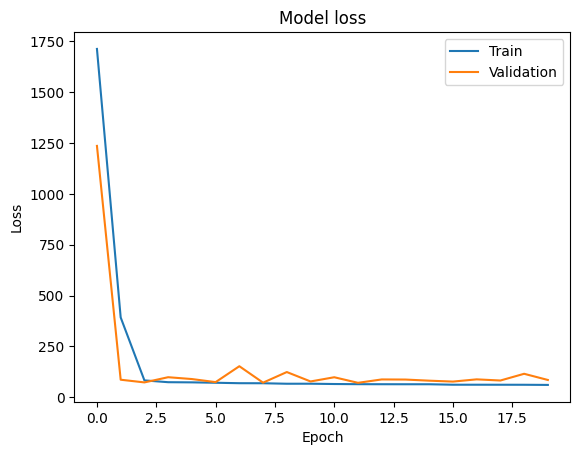

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## FNN and CNN

In [10]:
X_train,X_test,y_train,y_test = X_train_BIS,X_test_BIS,y_train_BIS,y_test_BIS
X = X_train.to_numpy()
y = y_train.to_numpy()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Reshape, Flatten
from tensorflow.keras.applications import DenseNet121
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Feedforward Neural Network
model_ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

model_ffnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model 2: Convolutional Neural Network (CNN)
model_cnn = Sequential([
    Reshape((13, 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



In [12]:
history=model_ffnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
382/382 [==============================] - 2s 3ms/step - loss: 1823.2594 - mae: 41.3848 - val_loss: 1252.2001 - val_mae: 34.2939
Epoch 2/10
382/382 [==============================] - 1s 3ms/step - loss: 686.7654 - mae: 24.0325 - val_loss: 229.5589 - val_mae: 13.2147
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 115.4575 - mae: 8.4531 - val_loss: 59.0578 - val_mae: 5.8893
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 63.9695 - mae: 6.1032 - val_loss: 53.7466 - val_mae: 5.5906
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 61.2654 - mae: 5.9981 - val_loss: 55.7553 - val_mae: 5.7082
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 60.5645 - mae: 5.9769 - val_loss: 54.2286 - val_mae: 5.6610
Epoch 7/10
382/382 [==============================] - 1s 3ms/step - loss: 58.3956 - mae: 5.8671 - val_loss: 51.5944 - val_mae: 5.5082
Epoch 8/10
382/382 [==============================]

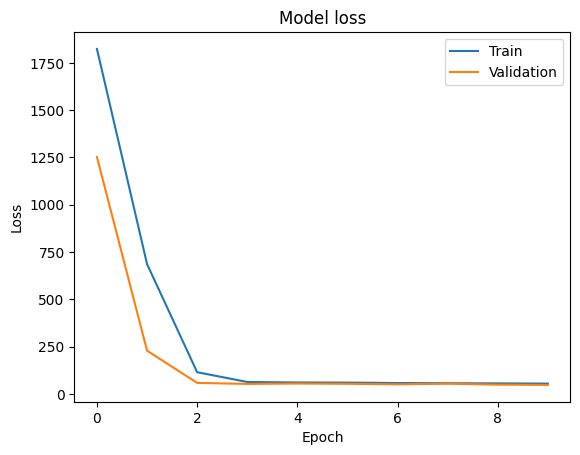

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
history=model_cnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
382/382 [==============================] - 2s 3ms/step - loss: 398.0557 - mae: 14.5410 - val_loss: 124.9603 - val_mae: 8.9078
Epoch 2/10
382/382 [==============================] - 1s 2ms/step - loss: 114.5532 - mae: 8.5077 - val_loss: 105.3850 - val_mae: 8.1619
Epoch 3/10
382/382 [==============================] - 1s 2ms/step - loss: 100.5284 - mae: 7.9546 - val_loss: 97.1471 - val_mae: 7.8277
Epoch 4/10
382/382 [==============================] - 1s 2ms/step - loss: 93.6712 - mae: 7.6636 - val_loss: 93.7902 - val_mae: 7.6612
Epoch 5/10
382/382 [==============================] - 1s 2ms/step - loss: 89.5643 - mae: 7.4687 - val_loss: 87.0153 - val_mae: 7.3804
Epoch 6/10
382/382 [==============================] - 1s 2ms/step - loss: 86.4070 - mae: 7.3052 - val_loss: 85.1660 - val_mae: 7.2847
Epoch 7/10
382/382 [==============================] - 1s 2ms/step - loss: 84.2608 - mae: 7.1979 - val_loss: 83.7755 - val_mae: 7.2306
Epoch 8/10
382/382 [==============================] - 1s

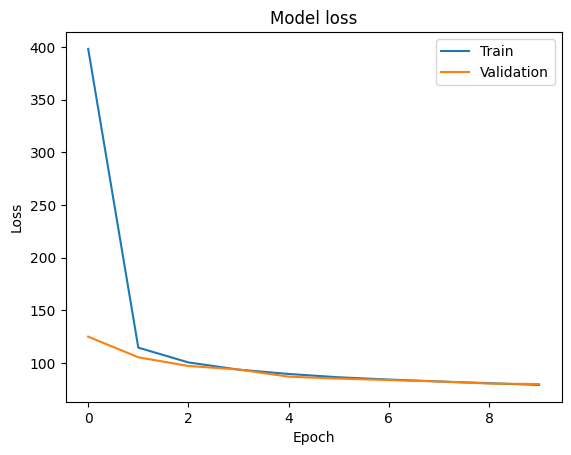

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## GRN

In [16]:
X_train,X_test,y_train,y_test = X_train_BIS,X_test_BIS,y_train_BIS,y_test_BIS
X = X_train.to_numpy()
y = y_train.to_numpy()

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Multiply
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gated Residual Block
def gated_residual_block(x, filters):
    y = Dense(filters)(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    # Gating mechanism
    z = Dense(filters)(x)
    z = BatchNormalization()(z)
    z = Activation('sigmoid')(z)

    # Element-wise multiplication
    gated_y = Multiply()([y, z])

    # Shortcut connection
    shortcut = Dense(filters)(x)
    shortcut = BatchNormalization()(shortcut)

    # Element-wise addition
    output = Add()([shortcut, gated_y])
    output = Activation('relu')(output)
    return output

# Build the Gated Residual Network
def build_grn(input_shape, num_blocks=3, num_filters=64):
    inputs = Input(shape=input_shape)

    # Gated Residual blocks
    x = inputs
    for _ in range(num_blocks):
        x = gated_residual_block(x, num_filters)

    # Fully connected layer for regression
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the Gated Residual Network
grn_model = build_grn(input_shape=(X_train_scaled.shape[1],))
grn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = grn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
382/382 [==============================] - 8s 6ms/step - loss: 307.0086 - mae: 11.8967 - val_loss: 79.3956 - val_mae: 6.8404
Epoch 2/10
382/382 [==============================] - 2s 6ms/step - loss: 71.9655 - mae: 6.5118 - val_loss: 62.0601 - val_mae: 5.9716
Epoch 3/10
382/382 [==============================] - 2s 5ms/step - loss: 66.0082 - mae: 6.1900 - val_loss: 55.1828 - val_mae: 5.6500
Epoch 4/10
382/382 [==============================] - 2s 6ms/step - loss: 62.6217 - mae: 6.0552 - val_loss: 52.7031 - val_mae: 5.5110
Epoch 5/10
382/382 [==============================] - 3s 8ms/step - loss: 58.5361 - mae: 5.8561 - val_loss: 52.3300 - val_mae: 5.5948
Epoch 6/10
382/382 [==============================] - 2s 5ms/step - loss: 57.7658 - mae: 5.7770 - val_loss: 49.4420 - val_mae: 5.3203
Epoch 7/10
382/382 [==============================] - 2s 5ms/step - loss: 58.8518 - mae: 5.8328 - val_loss: 50.9733 - val_mae: 5.4625
Epoch 8/10
382/382 [==============================] - 2s 5ms

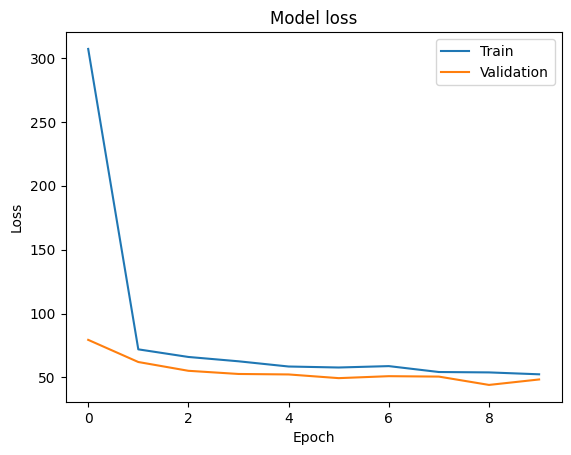

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Resnet

In [19]:
X_train,X_test,y_train,y_test = X_train_BIS,X_test_BIS,y_train_BIS,y_test_BIS
X = X_train.to_numpy()
y = y_train.to_numpy()

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ResNet block
def resnet_block(x, filters, kernel_size=3, stride=1):
    y = Dense(filters)(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Dense(filters)(y)
    y = BatchNormalization()(y)

    # Shortcut connection
    shortcut = Dense(filters)(x)
    shortcut = BatchNormalization()(shortcut)

    # Element-wise addition
    output = Add()([shortcut, y])
    output = Activation('relu')(output)
    return output

# Build the ResNet model
def build_resnet(input_shape, num_blocks=3, num_filters=64):
    inputs = Input(shape=input_shape)

    # Initial dense layer
    x = Dense(num_filters, activation='relu')(inputs)

    # ResNet blocks
    for _ in range(num_blocks):
        x = resnet_block(x, num_filters)

    # Flatten layer
    x = Flatten()(x)

    # Fully connected layer for regression
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile the ResNet model
resnet_model = build_resnet(input_shape=(X_train_scaled.shape[1],))
resnet_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = resnet_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
382/382 [==============================] - 9s 7ms/step - loss: 289.8859 - mae: 11.5120 - val_loss: 89.5642 - val_mae: 7.2256
Epoch 2/10
382/382 [==============================] - 2s 5ms/step - loss: 68.4680 - mae: 6.2907 - val_loss: 57.1651 - val_mae: 5.7027
Epoch 3/10
382/382 [==============================] - 2s 5ms/step - loss: 60.9835 - mae: 5.9611 - val_loss: 49.9053 - val_mae: 5.2874
Epoch 4/10
382/382 [==============================] - 2s 5ms/step - loss: 57.3968 - mae: 5.7678 - val_loss: 50.7465 - val_mae: 5.4521
Epoch 5/10
382/382 [==============================] - 2s 5ms/step - loss: 55.8380 - mae: 5.7001 - val_loss: 50.7567 - val_mae: 5.4142
Epoch 6/10
382/382 [==============================] - 3s 8ms/step - loss: 53.0008 - mae: 5.5444 - val_loss: 52.5661 - val_mae: 5.4760
Epoch 7/10
382/382 [==============================] - 2s 5ms/step - loss: 53.6699 - mae: 5.5468 - val_loss: 45.9535 - val_mae: 5.1663
Epoch 8/10
382/382 [==============================] - 2s 5ms

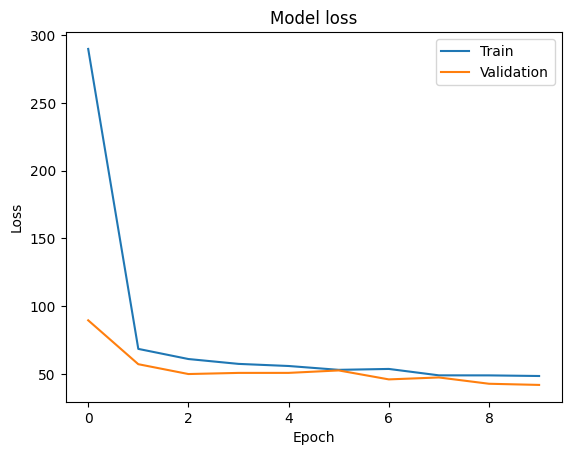

In [21]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [22]:
X_train,X_test,y_train,y_test = X_train_BIS,X_test_BIS,y_train_BIS,y_test_BIS
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


157/157 [==============================] - 1s 2ms/step


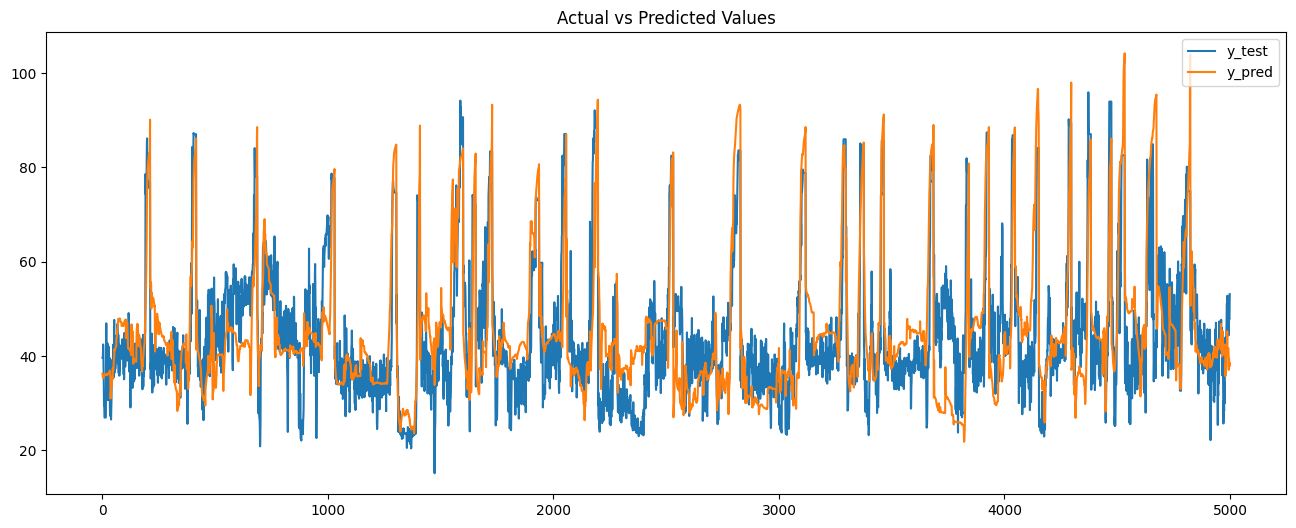

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras



# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# Make predictions on the test set
y_pred = resnet_model.predict(X_test_scaled[:5000])
plt.figure(figsize=(16, 6))
# Plot actual vs predicted values
plt.plot(y_test[:5000])
plt.plot(y_pred)

plt.title("Actual vs Predicted Values")
plt.legend(['y_test', 'y_pred'], loc='upper right')
plt.show()


In [24]:
y_test

array([39.63829093, 39.82187602, 39.80692548, ..., 90.67856058,
       90.67856058, 90.67856058])

In [25]:
y_pred

array([[36.247673],
       [35.78711 ],
       [35.497414],
       ...,
       [37.823036],
       [37.749275],
       [38.470726]], dtype=float32)